Initial w: [0.809 0.9   0.424] [0.031 0.61  0.838] [0.897 0.166]
Final w: [ 0.779  0.753 -0.457] [0.029 0.602 0.792] [-0.146 -1.382]
Error: 0.000 A: 0.209


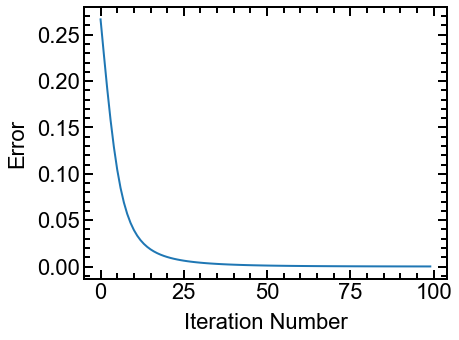

In [1]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('./sci.mplstyle')
import numpy as np

# Define activation function
def sigmoid(y):
    return 1.0/(1+np.exp(-1*y))
# Define error function
def error(A, Y):
    return np.power(A-Y, 2)
# Define derivative of error function
def d_error_A(A, Y):
    return 2*(A-Y)
# Define derivative of activation function
def d_A_y(A):
    return A*(1.0-A)
# Define derivative of linear function
def d_y_w(x):
    return x
# Define the gradient of weight
def update_w(w,grad,r):
    return w-r*grad

# Input value
x = np.array([0.1, 0.5, 3])
# Output value
Y = np.array([0.2])

# Learning rate
r = 0.5

# Guest a initial value of weight
w1 = np.random.rand(3) # i.e., w11, w21, w31
w2 = np.random.rand(3) # i.e., w12, w22, w32
w3 = np.random.rand(2) # i.e., w41, w42
w3_old = w3
np.set_printoptions(precision=3)
print("Initial w:", w1, w2, w3)

step = []
err_step = []

# Traning process
for k in range(100):
    # Forward pass
    y1 = np.sum(w1*x)
    y2 = np.sum(w2*x)
    A1 = sigmoid(y1)
    A2 = sigmoid(y2)
    y3 = np.sum(w3*np.array([A1, A2]))
    A3 = sigmoid(y3)
    err = error(A3, Y)
    
    # Backward pass
    g1 = d_error_A(A3,Y)
    g2 = d_A_y(A3)
    g3 = np.zeros(w3.shape[0])
    g3[0] = d_y_w(A1)
    g3[1] = d_y_w(A2)
    ## Weights of output layer
    grad_hidden = g3*g2*g1 # i.e., g41, g42
    w3 = update_w(w3,grad_hidden,r) # i.e., w41, w42
    ## Weights of firts neutro of hidden layer
    g3 = d_y_w(w3_old[0])
    g4 = d_A_y(A1)
    g5 = d_y_w(x)
    grad_hidden1 = g5*g4*g3*g2*g1 # i.e., g11, g21, g31
    w1 = update_w(w1,grad_hidden1,r) # i.e., w11, w21, w31
    ## Weights of second neutro of hidden layer
    g3 = d_y_w(w3_old[1])
    g4 = d_A_y(A2)
    g5 = d_y_w(x)
    grad_hidden2 = g5*g4*g3*g2*g1 # i.e., g12, g22, g32
    w2 = update_w(w2,grad_hidden2,r) # i.e., w12, w22, w32
    
    #Store results
    step.append((k))
    err_step.append((err))

# Print the final results
print("Final w:", w1, w2, w3)
print("Error: %5.3f"%err, "A: %5.3f"%A3)

# Create figure object
plt.figure()
# Add the x and y-axis labels
plt.xlabel('Iteration Number')
plt.ylabel('Error')
# Plot
plt.plot(step, err_step)
# Save figure
plt.savefig('ANN-1-hidden-layer.png')
plt.show()